# K Means

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [3]:
#Load Data
df=pd.read_csv(r"C:/Users/Data Science Cheat Sheets/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# We can not use categorical variables for KMeans clustering.

# Drop customer id since it contains all unique values and Gender 
# since it is a categorical variable.

df.drop(['CustomerID','Gender'], axis = 1, inplace = True)

In [8]:
# clean up column names
df.rename(columns = {'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'}, inplace = True)

In [9]:
df.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df), columns = df.columns)
df_scaled.head()

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


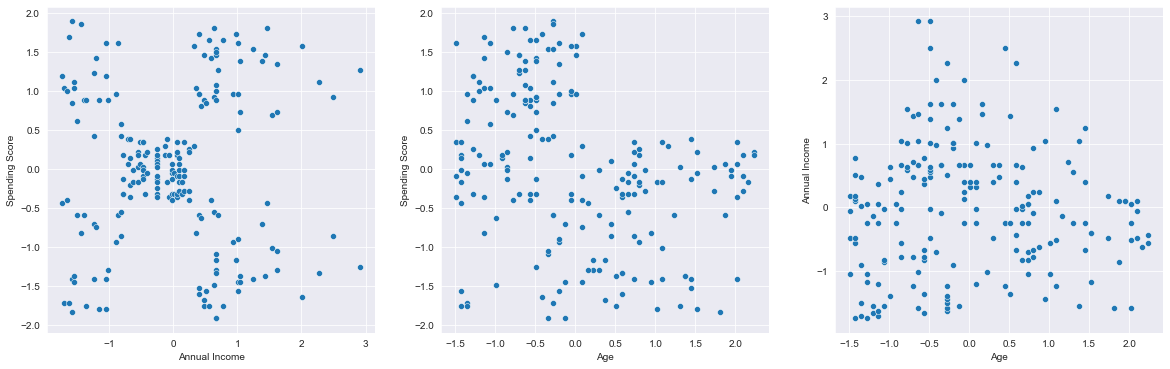

In [11]:
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
sns.scatterplot(data = df_scaled, x = 'Annual Income', y = 'Spending Score')
plt.subplot(1,3,2)
sns.scatterplot(data = df_scaled, x = 'Age', y = 'Spending Score')
plt.subplot(1,3,3)
sns.scatterplot(data = df_scaled, x = 'Age', y = 'Annual Income')
plt.show()

# Build the Model

In [12]:
# The number of clusters
K = 5

In [13]:
centroids = df_scaled.sample(5, random_state = 10)
centroids 

,Age,Annual Income,Spending Score
59,1.015499,-0.555747,-0.163051
5,-1.209269,-1.662660,1.001596
20,-0.276302,-1.395474,-0.590088
198,-0.491602,2.917671,-1.250054
52,-0.563369,-0.670255,0.147522


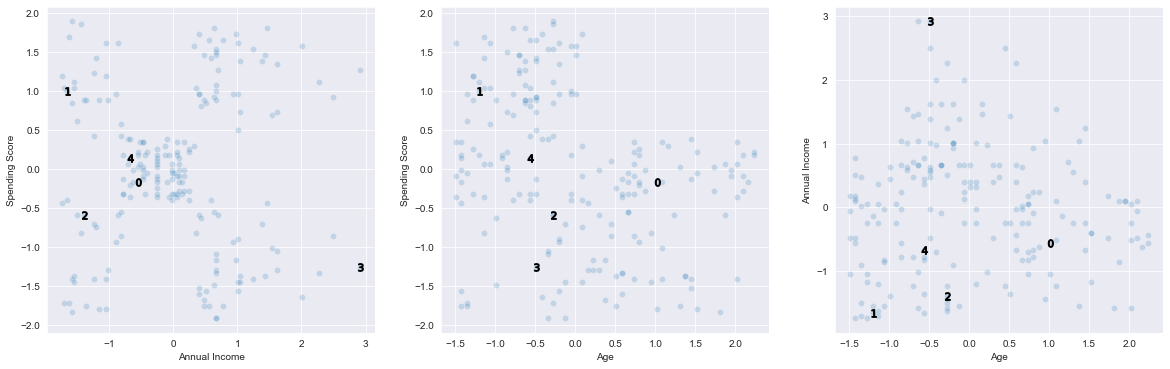

In [14]:
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
sns.scatterplot(data = df_scaled, x = 'Annual Income', y = 'Spending Score', alpha = 0.2)
for i in range(5):
    plt.scatter(x = centroids['Annual Income'].iloc[i], y = centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=60,color = 'Black')
plt.subplot(1,3,2)
sns.scatterplot(data = df_scaled, x = 'Age', y = 'Spending Score', alpha = 0.2)
for i in range(5):
    plt.scatter(x = centroids['Age'].iloc[i], y = centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=60,color = 'Black')
plt.subplot(1,3,3)
sns.scatterplot(data = df_scaled, x = 'Age', y = 'Annual Income', alpha = 0.2)
for i in range(5):
    plt.scatter(x = centroids['Age'].iloc[i], y = centroids['Annual Income'].iloc[i], marker = '$%d$' %(i), s=60,color = 'Black')
plt.show()

In [ ]:
Next, we will find the distance between the centroid and all other data points. 

In [15]:
from scipy.spatial.distance import cdist

In [17]:
#cdist returns the distance of each point from the centroid

distances = pd.DataFrame(cdist(df_scaled, centroids,'euclidean'), columns = ['Distance From C1','Distance From C2',
                                                                     'Distance From C3','Distance From C4',
                                                                     'Distance From C5'])

In [18]:
distances.head()

,Distance From C1,Distance From C2,Distance From C3,Distance From C4,Distance From C5
0,2.725411,1.454448,1.208570,4.818677,1.490966
1,2.918967,0.220581,2.077631,5.318789,1.660104
2,3.054741,2.721565,1.587318,4.721148,2.271052
3,2.719368,0.090080,1.869079,5.195575,1.479519
4,1.942250,1.539612,0.437577,4.659832,1.131487


In [19]:
#Assign cluster labels to each point based on whichever centroid it's closest to
cluster_labels = pd.Series(np.argmin(distances.values, axis = 1))

# displaying labels assigned to the first five rows
cluster_labels.head()

0    2
1    1
2    2
3    1
4    2
dtype: int64

In [20]:
import matplotlib.cm as cm

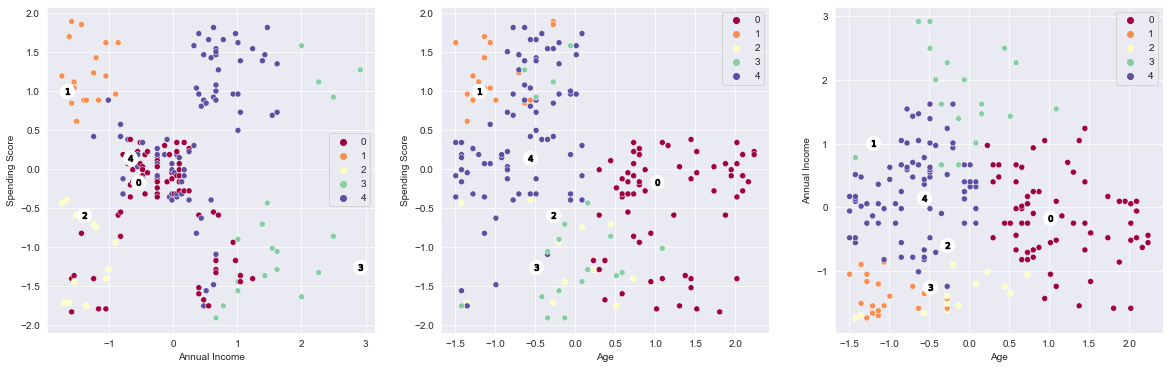

In [21]:
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)

sns.scatterplot(data = df_scaled, x = 'Annual Income', y = 'Spending Score', alpha = 1,hue = cluster_labels, palette='Spectral' )

for i in range(5):
    plt.scatter(x = centroids['Annual Income'].iloc[i], y = centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = centroids['Annual Income'].iloc[i], y = centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40, color = 'black')

plt.subplot(1,3,2)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Spending Score', alpha = 1,hue = cluster_labels, palette='Spectral')

for i in range(5):
    plt.scatter(x = centroids['Age'].iloc[i], y = centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = centroids['Age'].iloc[i], y = centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40, color = 'Black')

plt.subplot(1,3,3)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Annual Income', alpha = 1,hue = cluster_labels, palette='Spectral')

for i in range(5):
    plt.scatter(x = centroids['Age'].iloc[i], y = centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = centroids['Age'].iloc[i], y = centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40,color = 'Black')

plt.show()


In [22]:
new_centroids = []

for i in range(K):
    new_centroids.append(list(df_scaled[cluster_labels == i].mean().values))
    
new_centroids = pd.DataFrame(new_centroids, columns = df_scaled.columns, index = ['C1', 'C2','C3','C4','C5'])
new_centroids

,Age,Annual Income,Spending Score
C1,1.151644,-0.176298,-0.465059
C2,-1.024186,-1.377394,1.212050
C3,-0.193494,-1.380794,-1.055946
C4,-0.107650,1.679073,-0.776431
C5,-0.677298,0.281595,0.473138


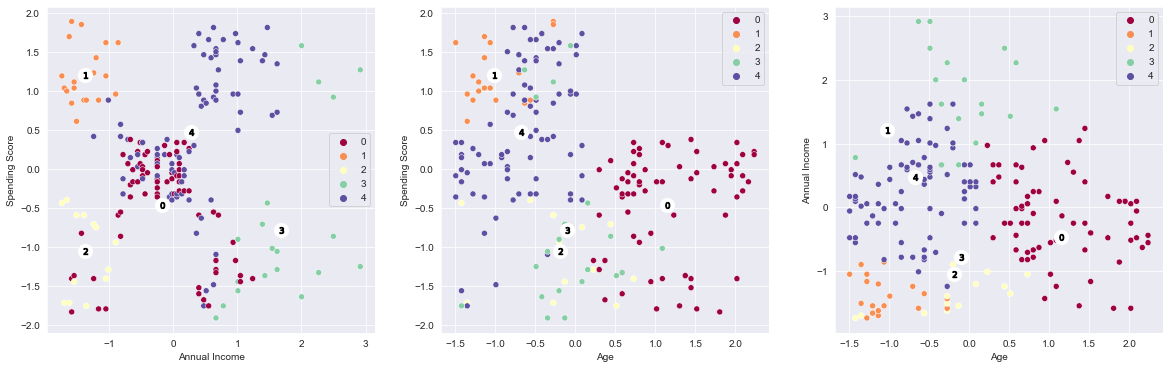

In [23]:
#visualize
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)

sns.scatterplot(data = df_scaled, x = 'Annual Income', y = 'Spending Score', alpha = 1,hue = cluster_labels, palette='Spectral' )

for i in range(5):
    plt.scatter(x = new_centroids['Annual Income'].iloc[i], y = new_centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = new_centroids['Annual Income'].iloc[i], y = new_centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40, color = 'black')

plt.subplot(1,3,2)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Spending Score', alpha = 1,hue = cluster_labels, palette='Spectral')

for i in range(5):
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40, color = 'Black')

plt.subplot(1,3,3)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Annual Income', alpha = 1,hue = cluster_labels, palette='Spectral')

for i in range(5):
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40,color = 'Black')

plt.show()


In [24]:
# cdist returns the distance of each point from the centroid

new_distances = pd.DataFrame(cdist(df_scaled, new_centroids,'euclidean'), columns = ['Distance From C1','Distance From C2',
                                                                     'Distance From C3','Distance From C4',
                                                                     'Distance From C5'])

In [25]:
new_distances.head()

,Distance From C1,Distance From C2,Distance From C3,Distance From C4,Distance From C5
0,3.013275,1.732970,1.424667,3.678886,2.337855
1,3.334382,0.443843,2.526062,4.116961,2.229215
2,3.187645,2.964046,1.371851,3.722469,3.029564
3,3.135419,0.383287,2.321275,3.973069,2.112724
4,2.270532,1.696906,0.807349,3.394054,2.132715


In [26]:
#Assign each datapoint to the nearest cluster
new_cluster_labels = pd.Series(np.argmin(new_distances.values, axis = 1))

# displaying labels assigned to the first five rows
new_cluster_labels.head()

0    2
1    1
2    2
3    1
4    2
dtype: int64

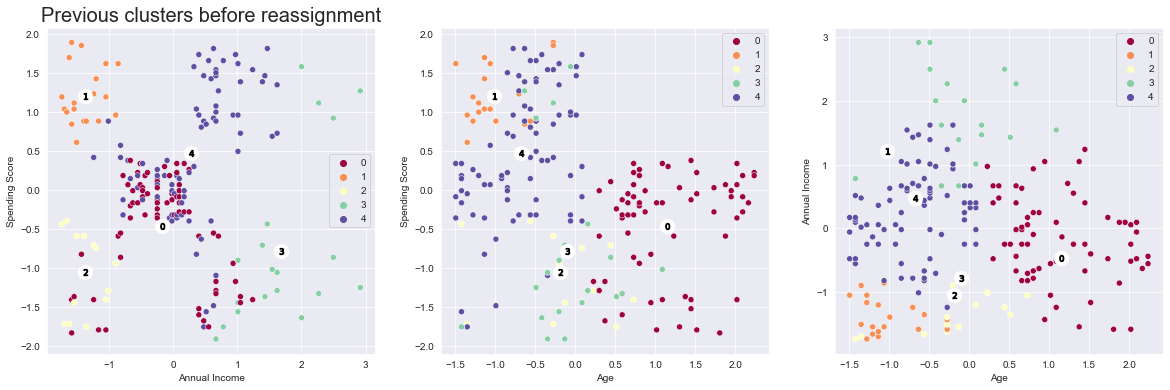

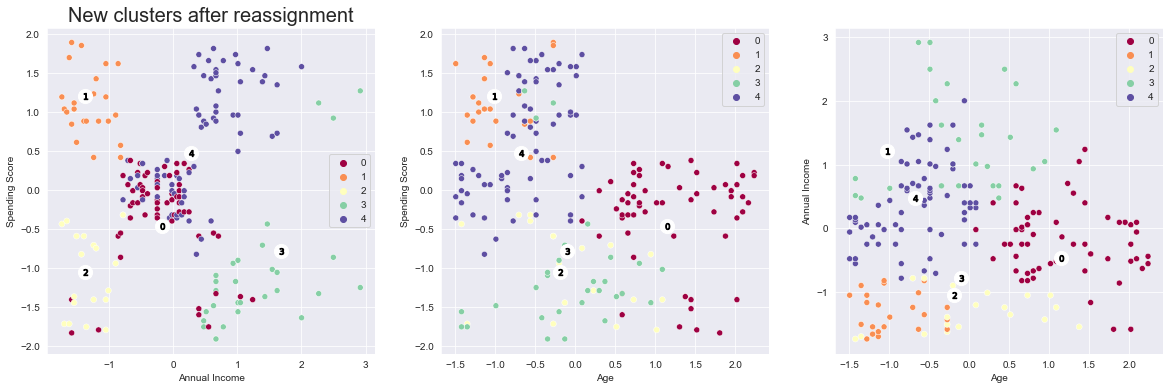

In [27]:
#visualize new clusters
plt.figure(figsize = (20,6))


plt.subplot(1,3,1)

sns.scatterplot(data = df_scaled, x = 'Annual Income', y = 'Spending Score', alpha = 1,hue = cluster_labels, palette='Spectral' )

for i in range(5):
    plt.scatter(x = new_centroids['Annual Income'].iloc[i], y = new_centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = new_centroids['Annual Income'].iloc[i], y = new_centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40, color = 'black')

plt.title('Previous clusters before reassignment', fontdict = {'fontsize' : 20})        
    
plt.subplot(1,3,2)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Spending Score', alpha = 1,hue = cluster_labels, palette='Spectral')

for i in range(5):
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40, color = 'Black')

plt.subplot(1,3,3)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Annual Income', alpha = 1,hue = cluster_labels, palette='Spectral')

for i in range(5):
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40,color = 'Black')

plt.show()


plt.figure(figsize = (20,6))

plt.subplot(1,3,1)

sns.scatterplot(data = df_scaled, x = 'Annual Income', y = 'Spending Score', alpha = 1,hue = new_cluster_labels, palette='Spectral' )

plt.title('New clusters after reassignment', fontdict = {'fontsize' : 20})     

for i in range(5):
    plt.scatter(x = new_centroids['Annual Income'].iloc[i], y = new_centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = new_centroids['Annual Income'].iloc[i], y = new_centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40, color = 'black')

plt.subplot(1,3,2)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Spending Score', alpha = 1,hue = new_cluster_labels, palette='Spectral')

for i in range(5):
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40, color = 'Black')

    

plt.subplot(1,3,3)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Annual Income', alpha = 1,hue = new_cluster_labels, palette='Spectral')

for i in range(5):
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40,color = 'Black')

plt.show()


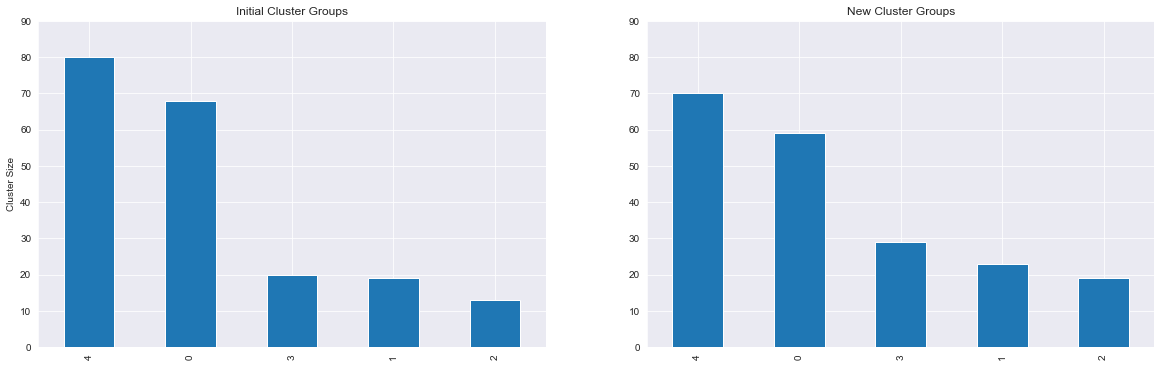

In [28]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)

plt.title('Initial Cluster Groups')

plt.ylabel('Cluster Size')

plt.ylim(0,90)

cluster_labels.value_counts().plot(kind = 'bar')

plt.subplot(1,2,2)

plt.title('New Cluster Groups')

plt.ylim(0,90)

new_cluster_labels.value_counts().plot(kind = 'bar')

plt.show()
